# "Exploratory Data Analysis of Dubai Rental Market with High-ROI Insights"

In [2]:
import pandas as pd
#loading the data
X=pd.read_csv(r"D:\DataScience\DS_DATA_SETS\DS_DATA_SETS\dubai_properties.csv")
X.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [3]:
#checking null values
X.isnull().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [4]:
X.shape

(73742, 17)

In [5]:
#deleting 2 columns
X.drop(columns=['Latitude','Longitude'],inplace=True)

In [6]:
#checking unique count of Address
X['Address'].nunique()

4515

In [7]:
#deleting 1 column - due to too much categorical values
X.drop(columns=['Address'],inplace=True)

In [8]:
#EDA for Rent
print(X[['Rent']].min())
print(X[['Rent']].max())

Rent    0
dtype: int64
Rent    55000000
dtype: int64


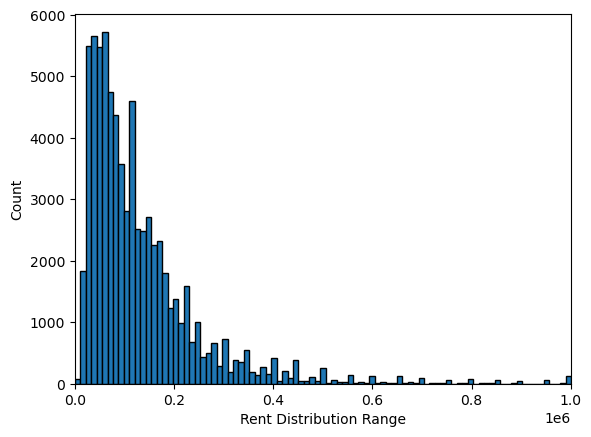

In [9]:
import matplotlib.pyplot as plt
plt.hist(X['Rent'],bins=5000,edgecolor='black')
plt.xlim(0,1000000)
plt.xlabel('Rent Distribution Range')
plt.ylabel('Count')
plt.show()

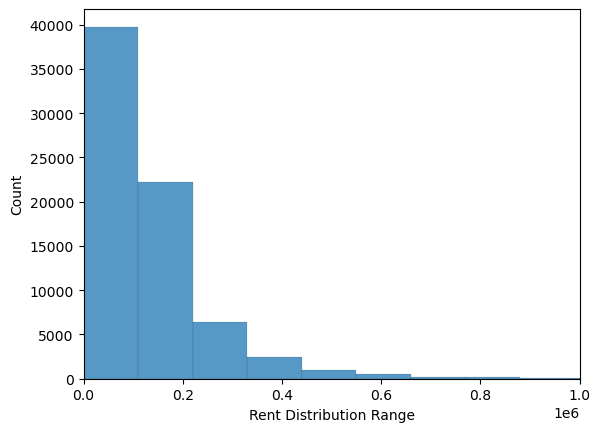

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(X['Rent'],bins=500,edgecolor='black')
plt.xlim(0,1000000)
plt.xlabel('Rent Distribution Range')
plt.ylabel('Count')
plt.show()

In [11]:
X=X.loc[(X['Rent_per_sqft']!=0)]
X

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City
0,124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi
1,140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi
2,99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi
3,220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi
4,350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain
73738,14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain
73739,50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain
73740,37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain


In [12]:
X['Beds'].value_counts()

Beds
1     19982
2     19816
3     12944
0      8416
4      5962
5      4268
6      1400
7       559
8       168
11       96
9        63
10       52
12        1
Name: count, dtype: int64

In [13]:
X['Baths'].value_counts()

Baths
2     41884
1      9577
3      7873
4      5695
5      3154
6      2068
7      1761
8       934
9       338
10      234
11      209
Name: count, dtype: int64

In [14]:
X.groupby('Type')

In [15]:
A=X.groupby('Type').agg({'Beds':['min','max'],'Baths':['min','max']}).reset_index()
#B=X.groupby('Type').agg({'Beds':'max','Baths':'max'}).reset_index()
A

Type Beds     Baths    
                         min max   min max
0             Apartment    0   9     1   9
1       Hotel Apartment    0   6     1   5
2             Penthouse    1   6     1   8
3  Residential Building    1  11     1  11
4     Residential Floor    1   5     2   3
5      Residential Plot    1   5     1   7
6             Townhouse    1   7     1  10
7                 Villa    1  12     1  11
8        Villa Compound    1   8     1  10

In [16]:
X[['Type']].value_counts().reset_index()

,Type,count
0,Apartment,56524
1,Villa,12878
2,Townhouse,3421
3,Hotel Apartment,465
4,Penthouse,270
5,Villa Compound,107
6,Residential Building,44
7,Residential Floor,12
8,Residential Plot,6


In [17]:
X.groupby(['City','Type'])[['Location']].count().reset_index().sort_values(by='Location',ascending=False)

,City,Type,Location
19,Dubai,Apartment,26146
0,Abu Dhabi,Apartment,17676
37,Sharjah,Apartment,8678
26,Dubai,Villa,5089
6,Abu Dhabi,Villa,4596
8,Ajman,Apartment,2817
25,Dubai,Townhouse,2358
14,Ajman,Villa,1850
5,Abu Dhabi,Townhouse,887
42,Sharjah,Villa,730


In [18]:
X.groupby('City')[['Location']].count()

,Location
City,
Abu Dhabi,23324
Ajman,4704
Al Ain,1040
Dubai,34236
Fujairah,27
Ras Al Khaimah,816
Sharjah,9515
Umm Al Quwain,65


In [19]:
X.groupby('City')[['Rent']].mean()

,Rent
City,
Abu Dhabi,115261.981693
Ajman,68247.255102
Al Ain,64640.382692
Dubai,213453.612542
Fujairah,73592.555556
Ras Al Khaimah,77539.276961
Sharjah,47888.281450
Umm Al Quwain,45230.769231


# CONFIRMED CITY DUBAI

In [20]:
Y=X.loc[X['City']=='Dubai']
Y

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City
29068,125000,2,2,Apartment,1145,109.170306,Medium,Yearly,Unfurnished,For Rent,2024-02-15,66,Jumeirah Village Circle (JVC),Dubai
29069,50000,1,2,Apartment,655,76.335878,Low,Yearly,Unfurnished,For Rent,2024-03-21,31,Jumeirah Village Circle (JVC),Dubai
29070,90000,1,2,Apartment,896,100.446429,Medium,Yearly,Furnished,For Rent,2024-04-08,13,Jumeirah Village Circle (JVC),Dubai
29071,125000,2,1,Apartment,720,173.611111,Medium,Yearly,Unfurnished,For Rent,2024-03-11,41,Dubai Hills Estate,Dubai
29072,105000,1,2,Apartment,965,108.808290,Medium,Yearly,Furnished,For Rent,2024-02-23,58,Jumeirah Village Circle (JVC),Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63313,450000,6,7,Villa,5500,81.818182,High,Yearly,Unfurnished,For Rent,2023-12-06,137,Umm Suqeim,Dubai
63314,44999,0,1,Apartment,316,142.401899,Low,Yearly,Unfurnished,For Rent,2023-12-01,142,Meydan City,Dubai
63315,95000,1,2,Apartment,731,129.958960,Medium,Yearly,Unfurnished,For Rent,2023-11-28,145,Jumeirah Village Circle (JVC),Dubai
63316,65000,2,2,Apartment,1200,54.166667,Low,Yearly,Unfurnished,For Rent,2023-10-27,177,Dubai Investment Park (DIP),Dubai


In [21]:
Y['Location'].nunique()

120

In [22]:
Y.groupby(['Location','Type'])[['Rent_per_sqft']].mean()

Rent_per_sqft
Location           Type                           
Al Awir            Apartment             72.100313
                   Villa                 24.109455
Al Badaa           Townhouse             65.656258
                   Villa                 42.697800
Al Barari          Apartment            136.478499
...                                            ...
Wasl Gate          Townhouse             78.191641
                   Villa                 76.718796
World Trade Centre Apartment            115.379868
Za'abeel           Apartment            191.940953
                   Residential Plot       6.913836

[298 rows x 1 columns]

In [23]:
Y.groupby(['Location'])[['Rent_per_sqft']].mean().reset_index().sort_values(by='Rent_per_sqft',ascending=False)

,Location,Rent_per_sqft
31,Bluewaters Island,329.640937
93,Pearl Jumeirah,232.609087
45,Dubai Harbour,226.933742
42,Downtown Dubai,199.156925
73,Jumeirah Islands,196.578116
...,...,...
60,Dubai Waterfront,46.803540
11,Al Khawaneej,33.605870
116,Wadi Al Shabak,30.028006
0,Al Awir,25.372372


# LOCATION CONFIRMED -Bluewaters Island

In [24]:
Y.loc[Y['Location']=='Bluewaters Island'].groupby('Type')['Rent_per_sqft'].mean()

Type
Apartment    329.855959
Penthouse    405.141005
Townhouse    271.571313
Name: Rent_per_sqft, dtype: float64

In [25]:
Y.loc[Y['Location']=='Bluewaters Island'].groupby('Type')['Area_in_sqft'].mean()

Type
Apartment    1804.412698
Penthouse    2468.000000
Townhouse    6447.500000
Name: Area_in_sqft, dtype: float64

In [26]:
Y.loc[Y['Location']=='Bluewaters Island']['Type'].value_counts()

Type
Apartment    189
Townhouse      2
Penthouse      1
Name: count, dtype: int64

In [27]:
Y.loc[Y['Location']=='Bluewaters Island'].groupby('Type').agg({'Rent_per_sqft':'mean','Area_in_sqft':'mean','Type':'value_counts'})

,Rent_per_sqft,Area_in_sqft,Type
Type,,,
Apartment,329.855959,1804.412698,189
Penthouse,405.141005,2468.000000,1
Townhouse,271.571313,6447.500000,2


# TYPE CONFIRMED- Apartment   

In [28]:
Z=Y.loc[(Y['Location']=='Bluewaters Island')&(Y['Type']=='Apartment')]
Z

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City
30024,400000,2,3,Apartment,1497,267.201069,High,Yearly,Unfurnished,For Rent,2024-03-14,38,Bluewaters Island,Dubai
30035,1200000,4,5,Apartment,2468,486.223663,High,Yearly,Unfurnished,For Rent,2022-10-10,559,Bluewaters Island,Dubai
30417,629000,3,4,Apartment,2088,301.245211,High,Yearly,Furnished,For Rent,2023-11-22,151,Bluewaters Island,Dubai
30781,1175000,4,5,Apartment,2467,476.286988,High,Yearly,Unfurnished,For Rent,2024-04-04,17,Bluewaters Island,Dubai
31049,535000,3,4,Apartment,2130,251.173709,High,Yearly,Furnished,For Rent,2024-03-18,34,Bluewaters Island,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62446,450000,2,3,Apartment,1350,333.333333,High,Yearly,Unfurnished,For Rent,2024-03-04,48,Bluewaters Island,Dubai
62461,450000,2,3,Apartment,1180,381.355932,High,Yearly,Furnished,For Rent,2023-08-09,256,Bluewaters Island,Dubai
62762,400000,2,3,Apartment,1636,244.498778,High,Yearly,Furnished,For Rent,2024-03-18,34,Bluewaters Island,Dubai
62847,1200000,4,5,Apartment,2467,486.420754,High,Yearly,Unfurnished,For Rent,2023-10-13,191,Bluewaters Island,Dubai


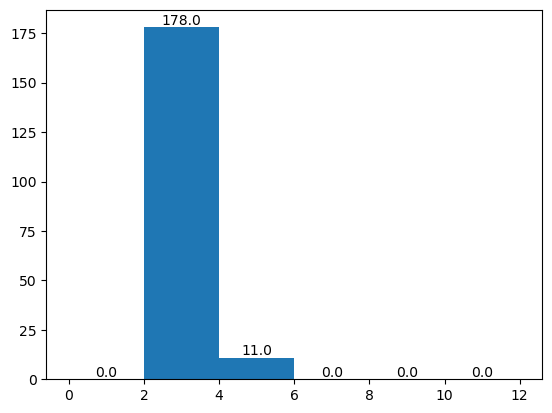

In [29]:
plt.hist(Z['Baths'],bins=[0,2,4,6,8,10,12])
ax=plt.gca()

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='bottom')
plt.show()

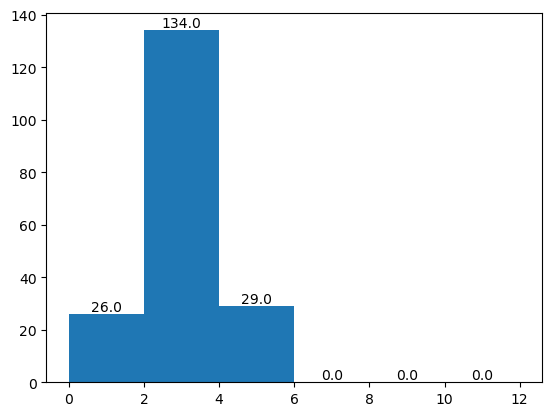

In [30]:
plt.hist(Z['Beds'],bins=[0,2,4,6,8,10,12])
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='bottom')
plt.show()

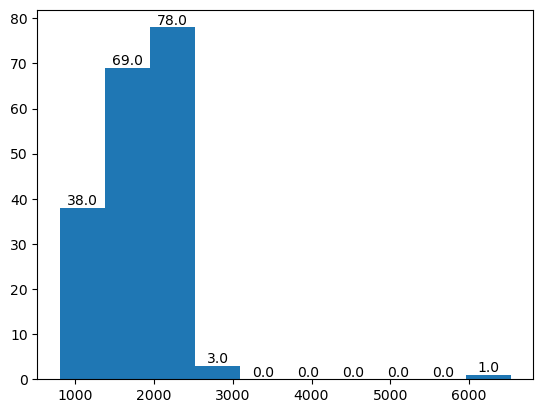

In [31]:
plt.hist(Z['Area_in_sqft'],bins=10)
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='bottom')
plt.show()

In [32]:
P=Z.groupby('Beds')[['Area_in_sqft']].mean().reset_index()
P

,Beds,Area_in_sqft
0,1,1041.461538
1,2,1581.448718
2,3,2051.660714
3,4,2610.689655


In [33]:
Q=Z.groupby('Baths')[['Area_in_sqft']].mean().reset_index()
Q

,Baths,Area_in_sqft
0,2,1786.895954
1,3,1541.000000
2,4,2035.833333
3,5,2396.200000


In [34]:
F=pd.DataFrame()
Bends=[]
Baths=[]
Area=[]
for i in Z['Beds'].unique():
    for j in Z['Baths'].unique():
        #print('Bed:',i,'Bath',j,'\n')
        o=Z.loc[(Z['Beds']==i)&((Z['Baths']==j))]['Area_in_sqft'].mean()
        
        print(f'FOR {i} BED & {j} BATH : ','Area : ',o)
        Bends.append(i)
        Baths.append(j)
        Area.append(o)
    print('Bed:',Bends)
    print('Baths:',Baths)
    print('Area:',Area)
    print('*'*20)
    

FOR 2 BED & 3 BATH :  Area :  1415.75
FOR 2 BED & 5 BATH :  Area :  nan
FOR 2 BED & 4 BATH :  Area :  nan
FOR 2 BED & 2 BATH :  Area :  1590.4054054054054
Bed: [2, 2, 2, 2]
Baths: [3, 5, 4, 2]
Area: [1415.75, nan, nan, 1590.4054054054054]
********************
FOR 4 BED & 3 BATH :  Area :  nan
FOR 4 BED & 5 BATH :  Area :  2467.5
FOR 4 BED & 4 BATH :  Area :  2467.0
FOR 4 BED & 2 BATH :  Area :  2640.5416666666665
Bed: [2, 2, 2, 2, 4, 4, 4, 4]
Baths: [3, 5, 4, 2, 3, 5, 4, 2]
Area: [1415.75, nan, nan, 1590.4054054054054, nan, 2467.5, 2467.0, 2640.5416666666665]
********************
FOR 3 BED & 3 BATH :  Area :  2042.0
FOR 3 BED & 5 BATH :  Area :  2111.0
FOR 3 BED & 4 BATH :  Area :  1949.6
FOR 3 BED & 2 BATH :  Area :  2061.061224489796
Bed: [2, 2, 2, 2, 4, 4, 4, 4, 3, 3, 3, 3]
Baths: [3, 5, 4, 2, 3, 5, 4, 2, 3, 5, 4, 2]
Area: [1415.75, nan, nan, 1590.4054054054054, nan, 2467.5, 2467.0, 2640.5416666666665, 2042.0, 2111.0, 1949.6, 2061.061224489796]
********************
FOR 1 BED & 3 BAT

In [35]:
Bends

[2, 2, 2, 2, 4, 4, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1]

In [36]:
F['Beds']=Bends
F['Baths']=Baths
F['Area']=Area
F

,Beds,Baths,Area
0,2,3,1415.750000
1,2,5,NaN
2,2,4,NaN
3,2,2,1590.405405
4,4,3,NaN
5,4,5,2467.500000
6,4,4,2467.000000
7,4,2,2640.541667
8,3,3,2042.000000
9,3,5,2111.000000


In [37]:
F.sort_values(by=['Beds','Baths'],ascending=True)

,Beds,Baths,Area
15,1,2,1041.461538
12,1,3,NaN
14,1,4,NaN
13,1,5,NaN
3,2,2,1590.405405
0,2,3,1415.750000
2,2,4,NaN
1,2,5,NaN
11,3,2,2061.061224
8,3,3,2042.000000


In [38]:
Z

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City
30024,400000,2,3,Apartment,1497,267.201069,High,Yearly,Unfurnished,For Rent,2024-03-14,38,Bluewaters Island,Dubai
30035,1200000,4,5,Apartment,2468,486.223663,High,Yearly,Unfurnished,For Rent,2022-10-10,559,Bluewaters Island,Dubai
30417,629000,3,4,Apartment,2088,301.245211,High,Yearly,Furnished,For Rent,2023-11-22,151,Bluewaters Island,Dubai
30781,1175000,4,5,Apartment,2467,476.286988,High,Yearly,Unfurnished,For Rent,2024-04-04,17,Bluewaters Island,Dubai
31049,535000,3,4,Apartment,2130,251.173709,High,Yearly,Furnished,For Rent,2024-03-18,34,Bluewaters Island,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62446,450000,2,3,Apartment,1350,333.333333,High,Yearly,Unfurnished,For Rent,2024-03-04,48,Bluewaters Island,Dubai
62461,450000,2,3,Apartment,1180,381.355932,High,Yearly,Furnished,For Rent,2023-08-09,256,Bluewaters Island,Dubai
62762,400000,2,3,Apartment,1636,244.498778,High,Yearly,Furnished,For Rent,2024-03-18,34,Bluewaters Island,Dubai
62847,1200000,4,5,Apartment,2467,486.420754,High,Yearly,Unfurnished,For Rent,2023-10-13,191,Bluewaters Island,Dubai


In [39]:
Z.head()

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City
30024,400000,2,3,Apartment,1497,267.201069,High,Yearly,Unfurnished,For Rent,2024-03-14,38,Bluewaters Island,Dubai
30035,1200000,4,5,Apartment,2468,486.223663,High,Yearly,Unfurnished,For Rent,2022-10-10,559,Bluewaters Island,Dubai
30417,629000,3,4,Apartment,2088,301.245211,High,Yearly,Furnished,For Rent,2023-11-22,151,Bluewaters Island,Dubai
30781,1175000,4,5,Apartment,2467,476.286988,High,Yearly,Unfurnished,For Rent,2024-04-04,17,Bluewaters Island,Dubai
31049,535000,3,4,Apartment,2130,251.173709,High,Yearly,Furnished,For Rent,2024-03-18,34,Bluewaters Island,Dubai


In [40]:
Z['Furnishing'].value_counts()

Furnishing
Furnished      103
Unfurnished     86
Name: count, dtype: int64

In [42]:
Z.groupby(['Beds','Furnishing'])[['Rent_per_sqft']].mean()

Rent_per_sqft
Beds Furnishing                
1    Furnished       335.771093
     Unfurnished     326.736487
2    Furnished       296.815169
     Unfurnished     264.918418
3    Furnished       319.693451
     Unfurnished     335.140977
4    Furnished       414.386660
     Unfurnished     483.029078

In [43]:
Z.groupby(['Baths','Furnishing'])[['Rent_per_sqft']].mean()

Rent_per_sqft
Baths Furnishing                
2     Furnished       322.602218
      Unfurnished     329.990957
3     Furnished       306.561430
      Unfurnished     300.267201
4     Furnished       312.958043
      Unfurnished     479.261879
5     Unfurnished     446.617021

In [44]:
Z.groupby(['Baths','Furnishing']).agg({'Rent_per_sqft':'mean','Area_in_sqft':'mean'})

Rent_per_sqft  Area_in_sqft
Baths Furnishing                              
2     Furnished       322.602218   1729.343750
      Unfurnished     329.990957   1858.649351
3     Furnished       306.561430   1619.333333
      Unfurnished     300.267201   1423.500000
4     Furnished       312.958043   1912.750000
      Unfurnished     479.261879   2282.000000
5     Unfurnished     446.617021   2396.200000

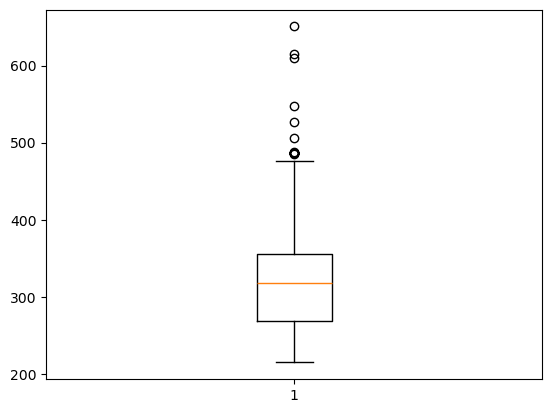

In [45]:
plt.boxplot(Z['Rent_per_sqft'])
plt.show()

In [46]:
Z1=Z.loc[Z['Rent_per_sqft']<480]
Z1

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City
30024,400000,2,3,Apartment,1497,267.201069,High,Yearly,Unfurnished,For Rent,2024-03-14,38,Bluewaters Island,Dubai
30417,629000,3,4,Apartment,2088,301.245211,High,Yearly,Furnished,For Rent,2023-11-22,151,Bluewaters Island,Dubai
30781,1175000,4,5,Apartment,2467,476.286988,High,Yearly,Unfurnished,For Rent,2024-04-04,17,Bluewaters Island,Dubai
31049,535000,3,4,Apartment,2130,251.173709,High,Yearly,Furnished,For Rent,2024-03-18,34,Bluewaters Island,Dubai
32156,700000,3,2,Apartment,2101,333.174679,High,Yearly,Furnished,For Rent,2024-02-17,64,Bluewaters Island,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62323,600000,3,3,Apartment,2042,293.829579,High,Yearly,Furnished,For Rent,2024-03-14,38,Bluewaters Island,Dubai
62446,450000,2,3,Apartment,1350,333.333333,High,Yearly,Unfurnished,For Rent,2024-03-04,48,Bluewaters Island,Dubai
62461,450000,2,3,Apartment,1180,381.355932,High,Yearly,Furnished,For Rent,2023-08-09,256,Bluewaters Island,Dubai
62762,400000,2,3,Apartment,1636,244.498778,High,Yearly,Furnished,For Rent,2024-03-18,34,Bluewaters Island,Dubai


In [47]:
Z1.groupby(['Furnishing'])[['Area_in_sqft']].mean()

,Area_in_sqft
Furnishing,
Furnished,1708.151515
Unfurnished,1767.619718


In [48]:
Z1.groupby(['Furnishing'])[['Rent']].std()

,Rent
Furnishing,
Furnished,200680.371968
Unfurnished,206736.782845


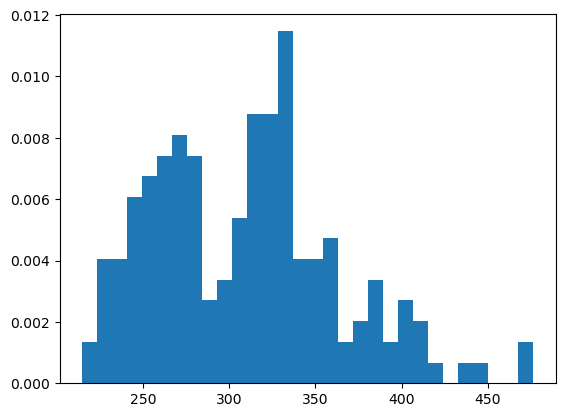

In [58]:
plt.hist(Z1['Rent_per_sqft'],bins=30,histtype="barstacked",density=True)
plt.show()

In [50]:
pd.set_option('Display.Max_rows',1000)
FN=Z1.loc[Z1['Furnishing']=='Furnished'].groupby(['Beds','Baths','Furnishing','Area_in_sqft'])[['Rent_per_sqft']].mean().reset_index()


In [51]:
UN=Z1.loc[Z1['Furnishing']=='Unfurnished'].groupby(['Beds','Baths','Furnishing','Area_in_sqft'])[['Rent_per_sqft']].mean().reset_index()

In [52]:
FF=pd.merge(FN,UN,on=['Beds','Baths'],how='outer').rename(columns={'Area_in_sqft_x':'FN AREA','Rent_per_sqft_x':'FN RENT','Area_in_sqft_y':'UN AREA','Rent_per_sqft_y':'UN RENT'})

FF

,Beds,Baths,Furnishing_x,FN AREA,FN RENT,Furnishing_y,UN AREA,UN RENT
0,1,2,Furnished,807.0,433.705081,Unfurnished,820.0,341.462195
1,1,2,Furnished,807.0,433.705081,Unfurnished,903.0,387.596899
2,1,2,Furnished,807.0,433.705081,Unfurnished,1112.0,278.776978
3,1,2,Furnished,807.0,433.705081,Unfurnished,1133.0,273.609885
4,1,2,Furnished,807.0,433.705081,Unfurnished,1138.0,268.014060
5,1,2,Furnished,807.0,433.705081,Unfurnished,1168.0,410.958904
6,1,2,Furnished,820.0,341.463415,Unfurnished,820.0,341.462195
7,1,2,Furnished,820.0,341.463415,Unfurnished,903.0,387.596899
8,1,2,Furnished,820.0,341.463415,Unfurnished,1112.0,278.776978
9,1,2,Furnished,820.0,341.463415,Unfurnished,1133.0,273.609885


In [53]:
FF.loc[(FF['Beds']==3)&(FF['Baths']==2)].sort_values(by='FN RENT',ascending =False)

,Beds,Baths,Furnishing_x,FN AREA,FN RENT,Furnishing_y,UN AREA,UN RENT
608,3,2,Furnished,2040.0,406.862745,Unfurnished,1800.0,319.444444
621,3,2,Furnished,2040.0,406.862745,Unfurnished,2173.0,333.640129
609,3,2,Furnished,2040.0,406.862745,Unfurnished,1850.0,323.783784
610,3,2,Furnished,2040.0,406.862745,Unfurnished,2042.0,327.864838
611,3,2,Furnished,2040.0,406.862745,Unfurnished,2045.0,317.848411
612,3,2,Furnished,2040.0,406.862745,Unfurnished,2097.0,324.082022
613,3,2,Furnished,2040.0,406.862745,Unfurnished,2099.0,309.671272
614,3,2,Furnished,2040.0,406.862745,Unfurnished,2100.0,353.968254
615,3,2,Furnished,2040.0,406.862745,Unfurnished,2102.0,380.589914
616,3,2,Furnished,2040.0,406.862745,Unfurnished,2103.0,332.382311


In [54]:
FF.loc[(FF['Beds']==3)&(FF['Baths']==2)].sort_values(by='UN RENT',ascending =False)

,Beds,Baths,Furnishing_x,FN AREA,FN RENT,Furnishing_y,UN AREA,UN RENT
769,3,2,Furnished,2174.0,312.787489,Unfurnished,2102.0,380.589914
643,3,2,Furnished,2049.0,292.825769,Unfurnished,2102.0,380.589914
741,3,2,Furnished,2112.0,307.765152,Unfurnished,2102.0,380.589914
587,3,2,Furnished,1800.0,333.333333,Unfurnished,2102.0,380.589914
685,3,2,Furnished,2100.0,245.238095,Unfurnished,2102.0,380.589914
713,3,2,Furnished,2104.0,281.606464,Unfurnished,2102.0,380.589914
615,3,2,Furnished,2040.0,406.862745,Unfurnished,2102.0,380.589914
727,3,2,Furnished,2111.0,378.967314,Unfurnished,2102.0,380.589914
755,3,2,Furnished,2130.0,244.131455,Unfurnished,2102.0,380.589914
573,3,2,Furnished,1658.0,361.881785,Unfurnished,2102.0,380.589914


# CONFIRMED-Furnished	-2040.0 SQFT	, RENT=406.862745 per sqft